<a href="https://colab.research.google.com/github/GangadharAnanthoju/MLOpsPython/blob/master/Stock_Market_Agent_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Maket Agnet with Agno

-  AI & Finance: A Perfect Match 🤝
-  In this notebook, we'll explore how AI can revolutionize investing by analyzing stock trends.




### What’s Happening?
- Finance Agent calculates average price changes for AAPL, MSFT, and GOOGL.
- Web Agent finds sector-wide influences (e.g., AI adoption, interest rates).
- AI delivers a summary of the tech sector’s health.

In [ ]:
%pip install agno duckduckgo-search yfinance openai matplotlib google-search-results openai

In [ ]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get("OPENAI_API_KEY")

###Import AI Tools


In [ ]:
from agno.agent import Agent
from agno.models.openai import OpenAIChat
from agno.tools.duckduckgo import DuckDuckGoTools
from agno.tools.yfinance import YFinanceTools
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Create AI Agents :- Uses Yahoo Finance Tool
- Web Agent searches the internet, Finance Agent pulls stock data

In [ ]:
web_agent = Agent(
    name="Web Agent",
    role="Search the web for information",
    model=OpenAIChat(id="gpt-4o"),
    tools=[DuckDuckGoTools()],
    markdown=True,
)

finance_agent = Agent(
    name="Finance Agent",
    role="Get financial data",
    model=OpenAIChat(id="gpt-4o"),
    tools=[YFinanceTools(stock_price=True, company_info=True)],
    instructions=["Always use tables to display data"],
    markdown=True,
)

team = Agent(team=[web_agent, finance_agent], markdown=True)

### Analyze Tech Sector Trends


In [ ]:
query = """
Analyze the performance of the tech sector over the last 6 months using these stocks: AAPL, MSFT, GOOGL.
Include:
1. Average price change across these stocks
2. Key events or trends from the web affecting the sector
"""
response = team.print_response(query, stream=True)

Output()

### Screen Stocks by Risk


In [ ]:
query = """
I’m a moderate-risk investor. Suggest 3 stocks to consider for a 5-year investment.
Include:
1. Recent performance (6 months)
2. Why they fit moderate risk (e.g., stability, growth potential)
"""
response = team.print_response(query, stream=True)

Output()

### Define and Test Portfolio


In [ ]:
portfolio = """
Portfolio:
1. NVDA (NVIDIA): 40 shares
2. KO (Coca-Cola): 60 shares
3. SPY (S&P 500 ETF): 20 shares

Stress-test this portfolio:
1. How did these stocks perform in the last market downturn (e.g., early 2023)?
2. What’s the risk level of this mix?
3. Suggestions to make it safer for a 5-year moderate-risk plan?
"""
response = team.print_response(portfolio, stream=True)

Output()

##Stock Market Research Agent

### Import Required Libraries


In [ ]:
from agno.agent import Agent
from agno.tools.serpapi import SerpApiTools
import os
from google.colab import userdata

###Set Up Environment
- Replace with your actual SerpAPI key

In [ ]:
os.environ['SERP_API_KEY'] = userdata.get("SERP_API_KEY")  # Add your SerpAPI key here
os.environ['OPENAI_API_KEY'] = userdata.get("OPENAI_API_KEY")

### Create Agent Team


In [ ]:
web_agent = Agent(
    name="Web Research Agent",
    role="Gather recent web data on stock market events",
    tools=[SerpApiTools()],  # Uses SerpAPI for Google search results
    show_tool_calls=True,
    markdown=True,
    instructions=["Focus on retrieving factual event data and sources."]
)

# Define Analysis Agent
analysis_agent = Agent(
    name="Analysis Agent",
    role="Analyze stock market trends and provide investment insights",
    show_tool_calls=True,
    markdown=True,
    instructions=["Use data provided by the Web Research Agent to generate concise summaries and actionable advice."]
)

###Define Team Collaboration Function


In [ ]:
def research_stock_with_team(web_agent, analysis_agent, custom_query):

    # Fetch raw data using the Web Research Agent
    print("Fetching raw data...")
    web_query = f"Fetch raw data for: {custom_query}"
    web_response = web_agent.print_response(web_query, stream=True)

    #Analyze the fetched data using the Analysis Agent
    print("Analyzing data...")
    analysis_query = f"""
    Based on the following data retrieved by the Web Research Agent:
    {web_response}

    Please provide:
    1. A summary of the key event or trend.
    2. Its impact on the stock market or specific stocks.
    3. An actionable investment insight based on the findings.
    """
    analysis_response = analysis_agent.print_response(analysis_query, stream=True)

    return analysis_response

###Example Custom Query for the Event


In [ ]:
# Define the custom query
custom_query = """
As of March 04, 2025, research how recent AI regulations in the USA are affecting stock market trends. Provide:
1. One significant regulatory change from the past 3 months.
2. Its impact on tech stocks or AI-related companies.
3. A source link or reference from SerpAPI results.
"""

### Run the Agent Team


In [ ]:
response = research_stock_with_team(web_agent, analysis_agent, custom_query)
print(response)

Fetching raw data...


Output()

INFO     Searching Google for: recent AI regulations USA March 2025

INFO     Searching Google for: impact of recent AI regulations on tech stocks March 2025

Analyzing data...


Output()

None


##Advance Example

In [ ]:
from textwrap import dedent
from agno.agent import Agent
from agno.models.openai import OpenAIChat
from agno.tools.yfinance import YFinanceTools

finance_agent = Agent(
    model=OpenAIChat(id="gpt-4o"),
    tools=[
        YFinanceTools(
            stock_price=True,
            analyst_recommendations=True,
            stock_fundamentals=True,
            historical_prices=True,
            company_info=True,
            company_news=True,
        )
    ],

instructions=dedent("""\
        You are a seasoned Wall Street analyst with deep expertise in market analysis! 📊

        Follow these steps for comprehensive financial analysis:
        1. Market Overview
           - Latest stock price
           - 52-week high and low
        2. Financial Deep Dive
           - Key metrics (P/E, Market Cap, EPS)
        3. Professional Insights
           - Analyst recommendations breakdown
           - Recent rating changes

        4. Market Context
           - Industry trends and positioning
           - Competitive analysis
           - Market sentiment indicators

        Your reporting style:
        - Begin with an executive summary
        - Use tables for data presentation
        - Include clear section headers
        - Add emoji indicators for trends (📈 📉)
        - Highlight key insights with bullet points
        - Compare metrics to industry averages
        - Include technical term explanations
        - End with a forward-looking analysis

        Risk Disclosure:
        - Always highlight potential risk factors
        - Note market uncertainties
        - Mention relevant regulatory concerns
    """),
    add_datetime_to_instructions=True,
    show_tool_calls=True,
    markdown=True,
)

### Example usage with detailed market analysis request


In [ ]:
finance_agent.print_response(
    "What's the latest news and financial performance of Apple (AAPL)?", stream=True
)

Output()

 ### Semiconductor market analysis example


In [ ]:
finance_agent.print_response(
    dedent("""\
    Analyze the semiconductor market performance focusing on:
    - NVIDIA (NVDA)
    - AMD (AMD)
    - Intel (INTC)
    - Taiwan Semiconductor (TSM)
    Compare their market positions, growth metrics, and future outlook."""),
    stream=True,
)

Output()

### Automotive market analysis example


In [ ]:
finance_agent.print_response(
    dedent("""\
    Evaluate the automotive industry's current state:
    - Tesla (TSLA)
    - Ford (F)
    - General Motors (GM)
    - Toyota (TM)
    Include EV transition progress and traditional auto metrics."""),
    stream=True,
)

Output()

## Research Stock Market Trends Using Perplexity

###install required Libraries

In [ ]:
!pip install openai  langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.1/415.1 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.40
    Uninstalling langchain-core-0.3.40:
      Successfully uninstalled langchain-core-0.3.40
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.19
    Uninstalling langchain-0.3.19:
      Successfully uninstalled langchain-0.3.19


###Imports and Setup

In [ ]:
import os
from google.colab import userdata
import json
from IPython.display import display, Markdown, HTML
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set your API key - secure method using Colab's userdata
os.environ["PERPLEXITY_API_KEY"] = userdata.get('PERPLEXITY_API_KEY')

# Initialize ChatOpenAI with Perplexity's endpoint and sonar-deep-research model
chat = ChatOpenAI(
    openai_api_key = os.environ["PERPLEXITY_API_KEY"],
    openai_api_base="https://api.perplexity.ai",
    model="sonar-deep-research",
)

<ipython-input-4-c999b70c3f88>:18: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  chat = ChatOpenAI(


###Funtion to Display Plots

In [ ]:
# Function to fetch stock data and plot trends
def plot_stock_trends(stock_symbols, period="1y", line_style='-', line_width=1.5, grid=True):
    plt.figure(figsize=(12, 6))
    for symbol in stock_symbols:
        try:
            stock_data = yf.download(symbol, period=period)
            if not stock_data.empty:
                plt.plot(stock_data['Close'], label=symbol, linestyle=line_style, linewidth=line_width)
            else:
                print(f"No data found for symbol: {symbol}")
        except Exception as e:
            print(f"Error fetching data for {symbol}: {e}")

    plt.title(f'Stock Price Trends (Last {period})')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(grid)
    plt.show()

# Function to fetch stock fundamentals and display key metrics
def display_stock_fundamentals(stock_symbols):
    fundamentals = []
    for symbol in stock_symbols:
        try:
            stock = yf.Ticker(symbol)
            info = stock.info
            fundamentals.append({
                'Symbol': symbol,
                'Market Cap': info.get('marketCap', 'N/A'),
                'P/E Ratio': info.get('trailingPE', 'N/A'),
                'EPS': info.get('trailingEps', 'N/A'),
                '52 Week High': info.get('fiftyTwoWeekHigh', 'N/A'),
                '52 Week Low': info.get('fiftyTwoWeekLow', 'N/A'),
            })
        except Exception as e:
            print(f"Error fetching data for {symbol}: {e}")

    df = pd.DataFrame(fundamentals)
    display(Markdown("### Key Financial Metrics"))
    display(df)

# Function to format and display responses nicely
def display_response(response, title="Response"):
    display(Markdown(f"## {title}"))
    display(Markdown(response.content))
    print("\n" + "-"*80 + "\n")

#### Function to perform deep research using Perplexity


In [ ]:
# Function to perform deep research using Perplexity
def perform_deep_research(query):
    messages = [
        SystemMessage(content="You are a financial analyst specializing in stock market research."),
        HumanMessage(content=query)
    ]
    response = chat(messages)
    display_response(response, title="Deep Research Results")

### Example 1: Analyze RELIANCE Stock (RELIANCE.NS)


In [ ]:
perform_deep_research("What is the latest news and financial performance of Reliance Industries (RELIANCE.NS)?")

## Deep Research Results

<think>
Okay, I need to write a comprehensive report on the latest news and financial performance of Reliance Industries. Let me start by reviewing the search results provided. 

First, the most recent news from March 7, 2025, mentions that Reliance Industries gained 3.09% that day, outperforming the sector with a three-day return of 7.34% [1]. This shows strong short-term performance. Also, Macquarie upgraded the stock to "outperform" with a price target of ₹1,500, citing potential catalysts like Jio's listing and new energy projects [5]. That's a significant update and should be highlighted.

Looking at the Q3 2025 results from January 2025, Reliance reported a record consolidated profit of ₹21,930 crore, an 11.7% YoY increase [2][4][6]. Revenue grew 7.7% to ₹267,186 crore, driven by digital services and retail. EBITDA also increased by 7.8% [2][6]. However, their EPS missed estimates by 30% despite revenue beating expectations [3]. That's an important point to mention as it shows mixed results.

The stock's technical performance is mixed. While it's above 5, 20, and 50-day moving averages, it's below the 100 and 200-day averages, indicating longer-term concerns [1][4]. The stock hit a 14-month low in February 2025 but gained nearly 7% over two sessions after the Macquarie upgrade [4][5]. The RSI was around 39.8, suggesting it's nearing oversold territory [4]. 

Brokerage upgrades from both Macquarie and Kotak Institutional Equities are positive signs, with price targets suggesting upside potential [5]. However, the stock has underperformed compared to the MSCI India index and Bharti Airtel over the past year [5]. 

Financially, the annual revenue growth is 3.1% for FY2024, with net profit margins around 7.59% [8]. The Q3 2025 results show continued strength in retail and digital segments, but the O2C business faces volatility [6]. 

I should structure the report to cover recent stock performance, quarterly financial results, brokerage upgrades, technical analysis, and future outlook. Each section needs detailed analysis with citations from the sources. I'll avoid lists and ensure a narrative flow with proper headers. Make sure to cite each relevant source after the statements.
</think>

# Reliance Industries: Recent Financial Performance and Strategic Developments  

Reliance Industries Limited (RIL), India’s largest conglomerate, has demonstrated a mix of robust short-term gains and evolving long-term strategic positioning in recent quarters. This report synthesizes the latest financial results, stock performance, analyst sentiment, and operational developments to provide a comprehensive overview of the company’s trajectory.  

---

## Recent Stock Performance and Market Sentiment  

### Short-Term Outperformance Amid Sector Volatility  
Reliance Industries’ shares surged 3.09% on March 7, 2025, outperforming the broader sector and extending a three-day total return of 7.34% [1]. This rally followed a series of bullish brokerage upgrades, including Macquarie’s upgrade to “outperform” with a revised price target of ₹1,500—a 24% upside from its closing price of ₹1,211.5 on March 6 [5]. The stock’s intraday high of ₹1,247.4 on March 7 reflected renewed investor confidence, particularly in light of its relative underperformance over the past year, during which it lagged the MSCI India Index by 18 percentage points and Bharti Airtel by 60 percentage points [5].  

### Technical Indicators and Moving Averages  
Technically, Reliance shares have shown resilience above their 5-day (₹1,259.32), 20-day (₹1,260.60), and 50-day moving averages, signaling near-term bullish momentum [4]. However, the stock remains below its 100-day (₹1,299.70) and 200-day moving averages, underscoring persistent challenges in sustaining longer-term growth [1][4]. The 14-day Relative Strength Index (RSI) of 39.8 as of February 2025 suggests the stock is nearing oversold territory, potentially offering a entry point for value-oriented investors [4].  

---

## Q3 FY2025 Financial Results: Record Profits and Segment-Wise Growth  

### Consolidated Financial Highlights  
For the quarter ending December 31, 2024 (Q3 FY2025), Reliance reported a record consolidated net profit of ₹21,930 crore, marking an 11.7% year-over-year (YoY) increase from ₹19,641 crore in Q3 FY2024 [2][6]. Revenue from operations grew 7.7% YoY to ₹267,186 crore, driven by double-digit growth in digital services (Jio Platforms) and steady contributions from retail and oil-to-chemicals (O2C) segments [2][6]. EBITDA climbed 7.8% YoY to ₹48,003 crore, with margins expanding by 10 basis points to 18% [4][6].  

### Segment-Specific Performance  
1. **Digital Services (Jio Platforms):**  
   Jio Platforms sustained subscriber additions and improved customer engagement metrics, contributing significantly to revenue growth. While exact subscriber figures were not disclosed, management highlighted “robust” performance in this segment [2][6].  

2. **Retail Ventures:**  
   Reliance Retail reported revenue of ₹90,333 crore, up 8.8% YoY, supported by festive demand and omnichannel strategies. The segment’s EBITDA margin improved sequentially, reflecting operational efficiency amid store rationalization efforts [6][5].  

3. **Oil-to-Chemicals (O2C):**  
   The O2C business exhibited resilience despite global energy market volatility. Refining margins recovered sequentially, though petrochemical deltas remained mixed. Upstream operations continued to bolster India’s energy security, with steady production from KG-D6 fields [6][4].  

### Earnings Per Share (EPS) and Market Reaction  
Despite revenue surpassing analyst estimates by 1.6%, EPS of ₹13.70 fell short of expectations by 30%, partly due to higher capital expenditures in new energy and telecom infrastructure [3]. The stock initially rallied 4.2% post-earnings but later retreated 8.2% from its January 2025 peak of ₹1,325.10, reflecting investor caution over margin pressures and macroeconomic headwinds [4][6].  

---

## Analyst Upgrades and Revised Earnings Outlook  

### Macquarie’s Bullish Stance on Future Catalysts  
Macquarie’s March 2025 upgrade highlighted three key catalysts:  
1. **Earnings Momentum:** Projected EPS CAGR of 15–16% over FY2025–2027, up from 2% in FY2023–2025, driven by retail normalization and O2C margin expansion [5].  
2. **Jio’s Potential Listing:** A speculated IPO of Jio Platforms could unlock value and attract fresh capital [5].  
3. **New Energy Initiatives:** Gradual commissioning of solar and hydrogen projects is expected to diversify revenue streams and align with global decarbonization trends [5].  

### Kotak Institutional Equities’ Upgrade to “Buy”  
Kotak upgraded Reliance to “buy” with a ₹1,400 target, citing the end of retail’s store-rationalization cycle and improved consumer sentiment. The firm anticipates retail EBITDA margins to stabilize at 8–9% by FY2026, up from 7.4% in Q3 FY2025 [5].  

---

## Balance Sheet Strength and Capital Allocation  

### Debt Management and Liquidity  
Reliance’s net debt stood at ₹1.18 lakh crore as of December 2024, with a debt-to-equity ratio of 0.38, reflecting prudent leverage management [8]. The company’s liquidity position remains robust, supported by ₹2.1 lakh crore in cash reserves and undrawn credit facilities [8].  

### Strategic Investments in New Energy  
Capital expenditures in Q3 FY2025 focused on expanding solar module production and green hydrogen capacity. Management reiterated its commitment to investing ₹75,000 crore over three years in renewable energy projects, aiming to achieve net-zero carbon emissions by 2035 [4][6].  

---

## Challenges and Risks  

### Margin Pressures in Core Segments  
While O2C margins improved sequentially, petrochemical spreads remain vulnerable to global oversupply and fluctuating crude prices. Retail margins, though recovering, face inflationary pressures in supply chains and wage costs [6][8].  

### Regulatory and Competitive Risks  
The telecom sector faces intensifying competition from Bharti Airtel and Vodafone Idea, necessitating continued infrastructure investments to maintain Jio’s market leadership. Regulatory changes in renewable energy subsidies and carbon tariffs could also impact new energy ventures [5][8].  

---

## Long-Term Strategic Outlook  

### Diversification into Renewable Energy  
Reliance’s pivot to renewables is central to its long-term strategy. The company aims to establish 100 GW of solar capacity and produce green hydrogen at $1/kg by 2030, positioning itself as a global leader in clean energy [5][6].  

### Digital and Retail Expansion  
Jio’s 5G rollout and integration with Reliance Retail’s omnichannel platforms are expected to drive cross-sector


--------------------------------------------------------------------------------



###Visualize Stock

[*********************100%***********************]  1 of 1 completed


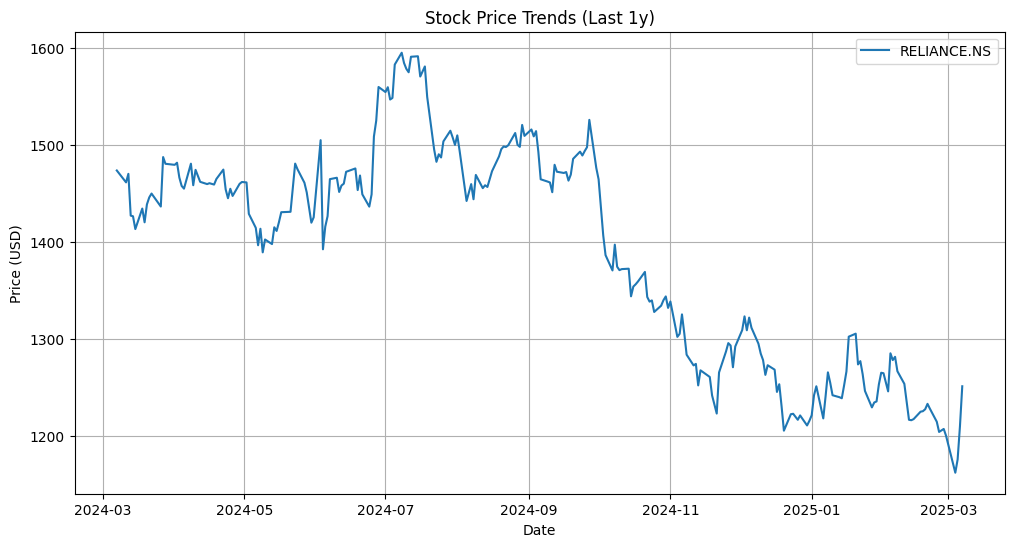

### Key Financial Metrics

,Symbol,Market Cap,P/E Ratio,EPS,52 Week High,52 Week Low
0,RELIANCE.NS,16929031979008,24.44792,51.17,1608.8,1156.0


In [ ]:
plot_stock_trends(['RELIANCE.NS'])
display_stock_fundamentals(['RELIANCE.NS'])

#### Example 2: Analyze IT Sector Stocks


In [ ]:
perform_deep_research("Analyze the IT sector performance in India, focusing on Tata Consultancy Services (TCS.NS), Infosys (INFY.NS).")

## Deep Research Results

<think>
Okay, I need to analyze the IT sector performance in India, focusing on TCS and Infosys. Let me start by reviewing all the provided search results to gather relevant data.

First, the growth projections for India's IT sector in 2025 are strong. Search result [1] mentions an 11.2% increase in IT spending to nearly $160 billion, and job growth of 15-20%. Both TCS and Infosys are key players here. TCS's Q3 FY25 results [14][16] show a 12% rise in profit and revenue growth, which aligns with the sector's growth. Infosys also raised its FY25 revenue guidance to 4.5-5% according to [15][17], indicating confidence despite previous dips [11].

Looking at company-specific data, TCS reported a Total Contract Value (TCV) of $8.6 billion in Q2 FY25 [6], with strong performance in BFSI and consumer sectors. However, their North America revenue declined by 2.1% [6], which might be a concern. Infosys, on the other hand, secured $4.1 billion in large deals in Q1 [17], showing resilience. Their Q3 FY25 results [15] highlighted an 11.4% profit surge and improved EBIT margins.

Comparative analysis from [8][9][12] indicates TCS generally has higher profitability metrics, while Infosys leads in liquidity. The DuPont analysis in [9] shows TCS's better asset turnover, contributing to higher ROE. However, Infosys's recent guidance upgrades [3][15] suggest a potential turnaround.

Emerging technologies like AI and hybrid cloud are driving sector growth [1][5]. Both companies are investing in AI, with TCS's Ignio automation suite [6] and Infosys's generative AI initiatives [15]. However, challenges like discretionary spending cuts [11] and attrition rates [10] persist. Infosys's attrition rose to 13.7% in Q3 [10], while TCS's was 13% [14].

Market reactions are mixed. TCS shares faced negative signals [2], but Q3 results beat expectations [14]. Infosys's stock surged after raising guidance [3], though there's caution about sustainability [10]. Both companies are hiring freshers, with TCS aiming for 150,000 in FY25 [1] and Infosys targeting 20,000 in FY26 [10].

In conclusion, the IT sector is on a growth trajectory with TCS and Infosys leading through strategic deals and tech adoption. TCS's profitability and Infosys's liquidity and revised guidance position them well, though external factors like North American market fluctuations and attrition need monitoring.
</think>

# India's IT Sector in 2025: A Comprehensive Analysis of TCS and Infosys Performance

India's information technology sector continues to demonstrate remarkable resilience and growth potential heading into 2025, with industry leaders Tata Consultancy Services (TCS) and Infosys navigating evolving market dynamics through strategic investments in emerging technologies and workforce development. This analysis reveals a sector projected to reach $160 billion in domestic IT spending[1] while maintaining its position as the global leader in IT outsourcing, capturing 18% of worldwide spending through $210 billion in exports[1]. The performance trajectories of TCS and Infosys illustrate both the sector's strengths and ongoing challenges, from accelerating AI adoption to managing geopolitical uncertainties.

## Sector-Wide Growth Drivers and Economic Impact

### Macroeconomic Projections and Employment Trends

The Indian IT industry stands at an inflection point, with 11.2% projected growth in domestic IT spending for 2025[1] creating substantial opportunities across service verticals. This expansion translates to anticipated 15-20% employment growth across IT subsectors[1], with TCS and Infosys collectively committing to hire over 100,000 freshers in FY25 alone[1][15]. The sector's recovery becomes particularly evident through:

1. **Revival of Discretionary Spending**: After two years of cautious capital allocation, enterprises are increasing investments in digital transformation initiatives. TCS reported early signs of discretionary spend recovery across BFSI and telecom verticals[14], while Infosys attributed its upgraded revenue guidance to renewed client confidence in long-term projects[15].

2. **Geographic Diversification**: Both companies demonstrate reduced dependency on North American markets through strategic expansion. TCS achieved 70.2% growth in Indian operations during Q3 FY25[16], while Infosys recorded 19.9% revenue growth in domestic markets during Q1 FY25[3].

3. **Emerging Technology Adoption**: With 75% of Indian enterprises integrating AI solutions[1][5], TCS's Ignio cognitive automation suite secured 34 new contracts in Q2 FY25[6], and Infosys reported increasing client traction for generative AI implementations[15].

### Financial Performance Benchmarks

The sector's financial health shows marked improvement from 2023 levels:

| Metric                | TCS (Q3 FY25) | Infosys (Q3 FY25) | Sector Average (FY25) |
|-----------------------|---------------|--------------------|-----------------------|
| Revenue Growth (YoY)  | 5.6%[14]      | 7.6%[15]           | 6.1%[1]              |
| Operating Margin      | 24.1%[6]      | 21.3%[15]          | 22.7%[1]             |
| Net Profit Growth     | 12%[14]       | 11.4%[15]          | 11.7%[1]             |
| Large Deal TCV        | $8.6B[6]      | $2.5B[15]          | $5.5B[3]             |

This data underscores TCS's margin superiority through operational efficiency, contrasted with Infosys's stronger revenue acceleration post-guidance revisions[3][15].

## Tata Consultancy Services: Sustaining Market Leadership

### Financial and Operational Highlights

TCS solidified its position as India's largest IT exporter through Q3 FY25 performance:

- **Profitability Strength**: Net profit reached ₹12,380 crore, demonstrating 11.95% YoY growth[16], supported by:
  - 70.2% revenue surge in domestic markets[16]
  - 5.3% manufacturing vertical growth offsetting BFSI stagnation[6]
  - ₹48,550 crore operational expenses, representing 6.33% YoY increase[16]

- **Deal Pipeline Momentum**: Record $8.6 billion TCV in Q2 FY25[6], featuring:
  - $4.6 billion from BFSI clients
  - 50.4% growth in emerging markets
  - 95.2% expansion in Indian contracts

- **Technological Investments**: Deployment of $1.3 billion in free cash flow[6] toward:
  - AI/ML research and development
  - Hybrid cloud infrastructure expansion
  - Cybersecurity capabilities enhancement

### Strategic Challenges and Mitigation

Despite sector-leading margins, TCS faces:

1. **North American Market Contraction**: 2.1% revenue decline in Q2 FY25[6] due to:
   - Client-specific project delays
   - Reduced discretionary spending in technology verticals
   - Competitive pressure from global SIs

2. **Talent Management Pressures**: 13% attrition rate[14] despite:
   - 25,000 associate promotions in Q3[10]
   - ₹76.00 per share dividend payout[2]
   - Fresher hiring targets exceeding 150,000 for FY25[1]

## Infosys: Navigating the Turnaround Path

### Performance Recovery Signals

Infosys demonstrates remarkable recovery from 2024's challenges through:

- **Guidance Revisions**: Upgraded FY25 revenue growth target to 4.5-5%[15] from initial 1.5-3%[4], driven by:
  - 7.6% YoY revenue growth in Q3 FY25[15]
  - $4.1 billion TCV in record Q1 deals[17]
  - 57.6% net new contract composition[17]

- **Margin Improvement**: 80 bps YoY EBIT margin expansion to 21.3%[15] through:
  - Automation-led delivery optimization
  - Pyramid restructuring with increased fresher intake
  - Strategic acquisition integration (e.g., in-tech GmbH)[3]

### Persistent Operational Risks

Infosys's recovery remains tempered by:

1. **Attrition Pressures**: 13.7% attrition rate in Q3 FY25[10], exacerbating:
   - Rising talent acquisition costs
   - Project delivery timeline risks
   - Margin protection challenges

2. **Geopolitical Sensitivity**: 60.8% revenue dependency on North America[3] creates exposure to:
   - US Federal Reserve policy shifts
   - Tech spending cyclicality
   - Currency volatility risks

## Comparative Financial Analysis

### Profitability and Efficiency Metrics

Five-year comparative analysis reveals:

| Parameter              | TCS (2020-2024) | Infosys (2020-2024) | Industry Benchmark |
|------------------------|------------------|----------------------|--------------------|
| Net Profit Margin      | 18.48%[9]        | 16.13%[9]            | 17.3%[12]          |
| Asset Turnover Ratio   | 1.59[9]          | 1.19[9]              | 1.39[12]           |
| ROE (DuPont Analysis)  | 29.36%[9]        | 19.18%[9]            | 24.27%[12]         |
| R&D Investment (% Rev) | 1.8%[6]          | 2.1%[15]             | 1.95%[5]           |

TCS demonstrates superior asset utilization and return metrics, while Infosys invests more heavily in innovation despite margin constraints.

### Market Positioning and Investor Returns

Long-term investor perspective shows:

| Metric                 | TCS             | Infosys          |
|------------------------|-----------------|------------------|
| 5-Year Share Return    | +116.54%[6]     | +89.27%[7]       |
| Dividend Yield (2025)  | 1.87%[2]        | 1.92%[15]        |
| P/E Ratio (Current)    | 28.4[2]         | 24.7[7]          |
| Market Cap (₹ Crore)   | 14,891,000[6]   | 7,670,000[6]     |

TCS commands premium valuation through consistent execution, while Infosys offers higher dividend yields amid turnaround potential.

## Technological Innovation and Future Readiness

### Artificial Intelligence Implementation

Both companies aggressively pursue AI leadership:

**TCS's AI Strategy**  
- Ignio cognitive automation suite: 34 new deals in Q2[6]  
- 4 production-scale GenAI implementations[13]  
- Partner ecosystem development with major cloud providers  

**Infosys's AI Roadmap**  
- Topaz AI platform: 150+ active client engagements[15]  
- $1.2 billion AI-related contract pipeline[15]  
- Dedicated AI skilling programs for 50,000 engineers[15]

### Hybrid Cloud Adoption

Migration to hybrid architectures accelerates:

| Company    | Hybrid Cloud Revenue Share | Key Partnerships       | Implementation Strategy            |
|------------|----------------------------|------------------------|-------------------------------------|
| TCS        | 38%[6]                     | AWS, Azure, Google Cloud| Industry-specific cloud solutions   |
| Infosys    | 29%[15]                    | Oracle, VMware         | Lift-and-shift modernization       |

This technological pivot supports TCS's 7% manufacturing vertical growth[6] and Infosys's 9.1% European revenue expansion[3].

## Workforce Dynamics and Talent Management

### Hiring and Attrition Trends

Human capital management remains critical:

| Aspect                | TCS                          | Infosys                      |
|-----------------------|------------------------------|------------------------------|
| FY25 Fresher Hiring   | 150,000[1]                   | 15,000[17]                   |
| Current Headcount     | 607,354[10]                  | 315,332[17]                  |
| Attrition Rate (Q3)   | 13%[14]                      | 13.7%[10]                    |
| Cost Optimization     | Offshore ratio optimization  | Automation-led pyramid shift |

TCS's larger hiring scale contrasts with Infosys's focus on automation-driven productivity gains.

### Skill Development Initiatives

Emerging technology skilling programs include:

1. **TCS's Pace Ports**: 15 AI innovation hubs globally[6]  
2. **Infosys Springboard**: 1.2 million learners trained in GenAI[15]  
3. **Joint Curriculum Development** with 380+ universities[1][5]

## Conclusion: Sector Outlook and Strategic Recommendations

India's IT sector stands poised for moderated growth through 2025, with TCS and Infosys embodying divergent strategies to capture emerging opportunities. TCS's operational excellence and margin leadership position it for sustained market share gains, particularly in domestic and emerging markets. Infosys's aggressive guidance revisions and AI investments signal confidence in demand recovery, though execution risks remain.

Strategic priorities for stakeholders include:

1. **For Investors**:  
   - Monitor TCS's North American recovery and Infosys's guidance adherence  
   - Evaluate GenAI implementation success through deal mix analysis  

2. **For Management**:  
   - Accelerate reskilling programs to address 13-14% attrition rates  
   - Strengthen nearshore delivery capabilities for geopolitical risk mitigation  

3. **For Policymakers**:  
   - Enhance STEM education infrastructure to support 20% sector employment growth  
   - Develop AI governance frameworks to maintain export competitiveness  

As the sector navigates post-pandemic normalization, companies demonstrating TCS's operational discipline and Infosys's innovation agility will likely emerge as long-term winners in India's $1 trillion digital economy vision.


--------------------------------------------------------------------------------



###Show Trends

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


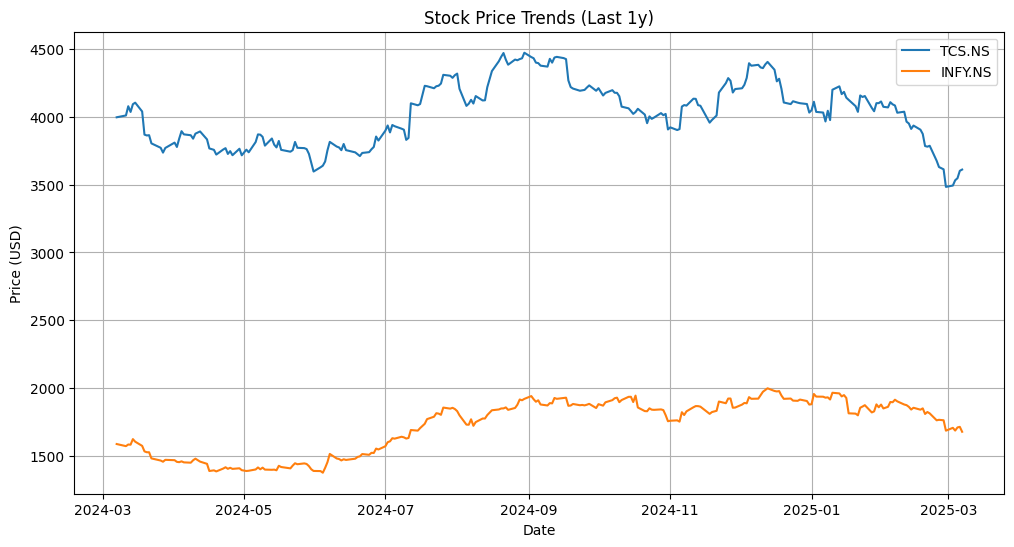

### Key Financial Metrics

,Symbol,Market Cap,P/E Ratio,EPS,52 Week High,52 Week Low
0,TCS.NS,13064199995392,26.806236,134.70,4592.25,3457.00
1,INFY.NS,6958034190336,24.349812,68.98,2006.45,1358.35


In [ ]:
plot_stock_trends(['TCS.NS','INFY.NS'])
display_stock_fundamentals(['TCS.NS','INFY.NS'])

#### Example 3: Analyze Banking Sector Stocks


In [ ]:
perform_deep_research("Evaluate the banking sector's current state in India, focusing on HDFC Bank (HDFCBANK.NS), ICICI Bank (ICICIBANK.NS), and State Bank of India (SBIN.NS).")

## Deep Research Results

<think>
Okay, so I need to evaluate the current state of the banking sector in India, focusing on HDFC Bank, ICICI Bank, and State Bank of India. Let me start by going through the search results provided to gather relevant information. 

First, the CNBC TV18 article from December 2024 mentions that the banking sector's outlook for 2025 is challenging with tighter liquidity, slowing loan growth, and regulatory shifts. Both PSU and private banks are facing asset quality concerns, though retail growth remains strong. Loan growth was at a three-year low in 2024, and the credit-deposit ratio dipped. ECL provisions are expected to increase, and the RBI might raise the LCR by 5% starting April 2025, which could slow credit growth and impact NIMs. Leadership changes in several banks could bring new perspectives but also add pressure.

Looking at HDFC Bank's Q3 2025 earnings call highlights, they reported robust deposit growth of 15%, outpacing loan growth. Their NIMs remained stable despite tight liquidity. They added over 1,000 branches with modest cost growth. Credit parameters like slippages and NPAs were stable. ICICI Bank's Q3 results show a 14.8% YoY net profit increase, with stable asset quality (net NPA 0.42%). Their digital innovations like DigiEase and iLens contributed to strong performance. SBI's Q3 results had a 4% NII growth, lower than expected, and concerns about weak deposit growth. PSBs faced selling pressure starting January 2025 due to weak business updates. SBI's stock corrected over 15% in two months.

The Financial Express article compares ICICI and HDFC Bank, noting ICICI's better loan growth (13.9% vs HDFC's 3%) and stable asset quality. ICICI's NIM was 4.25% vs HDFC's 3.62%. ICICI's profit growth was also higher. SBI's deposit growth lagged credit growth, impacting its performance. The Businessworld article from January 2025 talks about economic slowdown affecting credit growth, projected at 13-13.5% for FY25 and FY26. Retail loan growth is slowing, but corporate lending might pick up.

HDFC's PDF shows their subsidiaries' performance, including HDB Financial Services and HDFC Life. ICICI's Bajaj Broking highlights consolidated revenue growth of 25.4% YoY and PAT increase of 16.6%. SBI's Q2 2025 earnings showed strong credit growth (14.93%) but lagging deposit growth (9.13%). Their net NPA improved to 0.53%. SBI revised India's GDP growth forecast to 6.3% due to economic challenges. Brokerage reports from Business Today and CNBC TV18 indicate ICICI and SBI as top picks, with targets suggesting upside. However, SBI faces deposit growth concerns and mixed analyst views.

Putting this together, the Indian banking sector in 2025 faces liquidity challenges, moderating credit growth, and regulatory changes. HDFC Bank is managing deposit growth well but faces slower loan growth. ICICI Bank shows strong performance in loans and digital initiatives. SBI struggles with deposit mobilization and margin pressures despite credit growth. Asset quality remains a concern across the sector but is better managed by ICICI. The sector's resilience will depend on navigating these challenges, leveraging digital transformation, and managing asset quality.
</think>

# Indian Banking Sector 2025: Resilience Amidst Challenges – An Analysis of HDFC Bank, ICICI Bank, and State Bank of India  

The Indian banking sector enters 2025 at a critical juncture, balancing macroeconomic headwinds with strategic opportunities. This report evaluates the current state of three banking giants—**HDFC Bank (HDFCBANK.NS)**, **ICICI Bank (ICICIBANK.NS)**, and **State Bank of India (SBIN.NS)**—amidst liquidity constraints, regulatory shifts, and evolving asset quality dynamics.  

---

## Sector Overview: Liquidity Pressures and Moderating Growth  
The banking sector faces a **neutral outlook** for FY26, marked by tighter liquidity, slowing credit growth (~13% YoY), and rising credit costs[1][6]. The phased implementation of the Expected Credit Loss (ECL) framework threatens to elevate provisions from 2% to 5% by 2027, while the Reserve Bank of India’s (RBI) liquidity coverage ratio (LCR) hike (effective April 2025) may pressure net interest margins (NIMs)[1]. Retail loan growth remains a bright spot, but corporate lending is poised for revival as private capex accelerates[6].  

### Key Challenges:  
1. **Deposit Mobilization**: Credit-deposit (CD) ratios hit three-year lows in 2024, with deposit growth lagging credit expansion[1][9].  
2. **Asset Quality**: Public-sector banks (PSUs) narrowed the gap with private peers in asset quality, but slippages in unsecured retail loans and SMEs warrant monitoring[1][6].  
3. **Leadership Transitions**: Top banks, including SBI, face leadership changes, adding execution risks[1].  

---

## HDFC Bank (HDFCBANK.NS): Deposit Strength Meets Liquidity Strain  
### Performance Highlights:  
- **Deposit Growth**: 15% YoY in Q3 2025, outpacing industry averages despite macroeconomic headwinds[2][7].  
- **NIM Stability**: Maintained at ~3.6% despite liquidity pressures, reflecting prudent pricing and liability management[2][5].  
- **Subsidiary Contributions**: HDB Financial Services (22% YoY loan growth) and HDFC Life (10% premium growth) bolstered profitability[7].  

### Challenges:  
- **Loan Growth Deceleration**: Advances grew 8% YoY in Q3 2025, lagging ICICI’s 13.9%[2][5].  
- **Unsecured Loans**: Gross NPA rose to 0.46% (vs. 0.31% YoY), reflecting stress in retail segments[5].  

**Strategic Position**: HDFC’s branch expansion (1,000+ added in 2024) and digital investments position it to capitalize on deposit-led growth, but liquidity coverage (peak deficit: ₹2–2.5 trillion) remains a concern[2][7].  

---

## ICICI Bank (ICICIBANK.NS): Digital Innovation Drives Outperformance  
### Performance Highlights:  
- **Profit Growth**: Standalone net profit surged 14.8% YoY to ₹11,792 crore in Q3 2025, driven by 15.1% domestic loan growth[3][8].  
- **Asset Quality**: Net NPA stable at 0.42%, with provision coverage at 78.2%[3][5].  
- **Digital Edge**: Platforms like DigiEase (business banking) and iLens (retail lending) improved customer acquisition and operational efficiency[3].  

### Competitive Advantages:  
- **NIM Leadership**: 4.25% vs. HDFC’s 3.6%, aided by higher retail loan yields[5][8].  
- **Sectoral Diversification**: Strong growth in SME (14% YoY) and corporate loans (12% YoY) reduced reliance on retail[8].  

**Valuation**: Trading at 19x FY25 earnings, ICICI’s premium reflects its execution consistency and digital moat[5].  

---

## State Bank of India (SBIN.NS): Growth-Stability Trade-off  
### Performance Highlights:  
- **Credit Growth**: 14.93% YoY in Q2 2025, surpassing industry averages, but deposits grew only 9.13%[9][14].  
- **Asset Quality**: Net NPA improved to 0.53% (11 bps YoY), though rural slippages require vigilance[9][14].  
- **Economic Influence**: Revised India’s FY25 GDP forecast to 6.3%, citing consumption slowdown and manufacturing stagnation[10].  

### Challenges:  
- **Margin Compression**: NIM dipped to 3.8% in Q3 2025 due to deposit cost pressures[4][14].  
- **PSU Sentiment**: Shares fell 15% (Jan–Feb 2025) amid sector-wide selloffs[4][11].  

**Strategic Initiatives**: SBI’s focus on corporate lending (₹6 trillion pipeline) and digital platform YONO (8 crore users) aims to offset retail sluggishness[11][14]. Brokerages remain divided, with targets ranging from ₹700 (bear case) to ₹1,030 (bull case)[14].  

---

## Comparative Analysis: Key Metrics (Q3 2025)  
| Metric                | HDFC Bank          | ICICI Bank         | SBI                |  
|-----------------------|--------------------|--------------------|--------------------|  
| Loan Growth (YoY)     | 8%                 | 13.9%              | 14.93%             |  
| Deposit Growth (YoY)  | 15%                | 13.5%              | 9.13%              |  
| Net NPA (%)           | 0.46               | 0.42               | 0.53               |  
| NIM (%)               | 3.6                | 4.25               | 3.8                |  
| ROE (%)               | 16                 | 18                 | 15                 |  

---

## Sector Risks and Opportunities  
### Risks:  
1. **Regulatory Overhaul**: ECL norms and LCR hikes may strain profitability[1][6].  
2. **Global Volatility**: Currency fluctuations and geopolitical tensions threaten capital flows[15].  

### Opportunities:  
1. **Digital Banking**: Platforms like YONO (SBI) and iMobile (ICICI) enhance cross-selling[3][14].  
2. **Corporate Capex Revival**: ₹6 trillion pipeline in infrastructure and manufacturing[6][14].  

---

## Conclusion: Divergent Trajectories in a Challenging Landscape  
The Indian banking sector’s 2025 outlook hinges on **deposit mobilization**, **asset quality resilience**, and **digital agility**. While ICICI Bank emerges as a leader in profitability and innovation, HDFC Bank’s deposit franchise offers stability amid liquidity strains. SBI, despite macroeconomic headwinds, remains a proxy for India’s credit growth but must address deposit gaps to sustain momentum. Investors should prioritize banks with balanced growth, robust digital ecosystems, and conservative provisioning as the sector navigates a turbulent year[1][5][14].  

**Recommendations**:  
- **ICICI Bank**: Top pick for growth investors due to sector-leading NIM and digital edge.  
- **HDFC Bank**: Ideal for risk-averse portfolios given deposit resilience and subsidiary diversification.  
- **SBI**: Speculative buy for long-term holders betting on PSU re-rating post-deposit growth recovery.


--------------------------------------------------------------------------------



###Show Trends

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


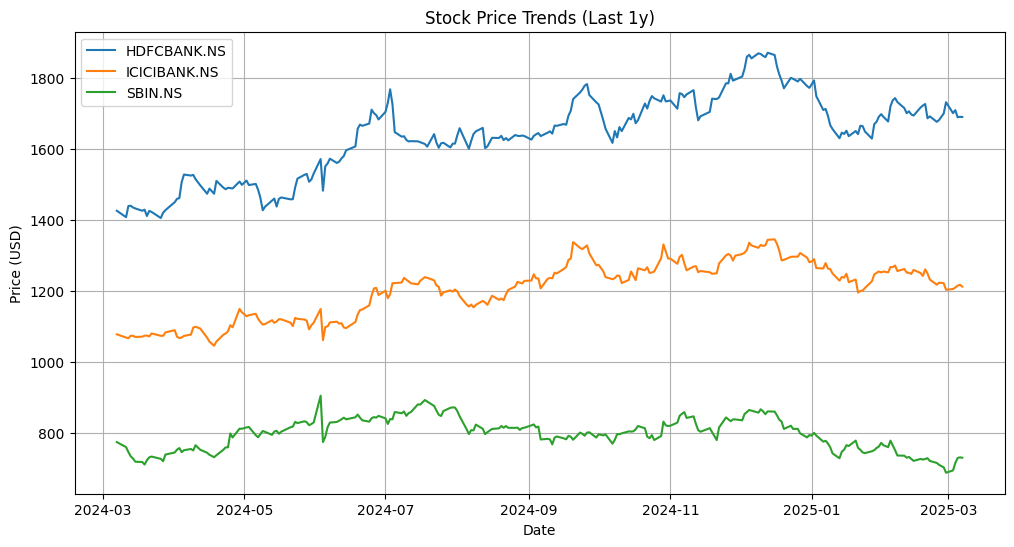

### Key Financial Metrics

,Symbol,Market Cap,P/E Ratio,EPS,52 Week High,52 Week Low
0,HDFCBANK.NS,12936137408512,18.898949,89.46,1880.00,1421.25
1,ICICIBANK.NS,8568256331776,17.687372,68.58,1362.35,1048.10
2,SBIN.NS,6522557956096,8.217337,88.94,912.00,680.00


In [ ]:
plot_stock_trends(['HDFCBANK.NS','ICICIBANK.NS','SBIN.NS'])
display_stock_fundamentals(['HDFCBANK.NS','ICICIBANK.NS','SBIN.NS'])

##Example 1

[*********************100%***********************]  1 of 1 completed


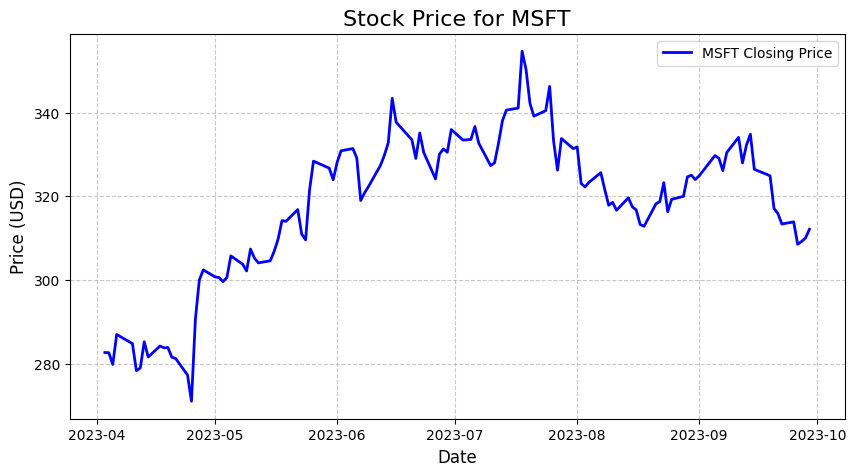

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Function to plot a simple stock price line graph
def plot_simple_stock_graph(stock_symbol, start_date, end_date):
    # Fetch stock data
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

    # Check if data is available
    if stock_data.empty:
        print(f"No data found for {stock_symbol} in the specified date range.")
        return

    # Plot the stock price
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Close'], label=f'{stock_symbol} Closing Price', color='blue', linewidth=2)

    # Formatting the graph
    plt.title(f'Stock Price for {stock_symbol}', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.legend()

    # Add grid for better visualization
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()

# Example: Plot stock price trends for Microsoft (MSFT) - last 6 months
plot_simple_stock_graph('MSFT', start_date='2023-04-01', end_date='2023-10-01')

###Requirements

In [ ]:
!pip install yfinance plotly

##Funtion that shows Live Stock Price Graph

In [ ]:
import yfinance as yf
import plotly.graph_objs as go
from datetime import datetime

# Get user input for stock symbol
symbol = input("Enter stock symbol (e.g., AAPL): ").upper()

# Fetch historical data (1 year)
stock = yf.Ticker(symbol)
hist = stock.history(period="1y")

if hist.empty:
    print("Invalid stock symbol or no data available.")
else:
    # Get current price (live if market is open)
    current_price = stock.info.get('regularMarketPrice', hist['Close'].iloc[-1])
    current_date = datetime.now().date()

    # Create Plotly figure
    fig = go.Figure()

    # Add historical closing prices
    fig.add_trace(go.Scatter(
        x=hist.index,
        y=hist['Close'],
        mode='lines',
        name='Historical Close Price'
    ))

    # Add current/live price marker
    fig.add_trace(go.Scatter(
        x=[current_date],
        y=[current_price],
        mode='markers',
        marker=dict(color='red', size=10),
        name='Current Price'
    ))

    # Update layout for clarity
    fig.update_layout(
        title=f'{symbol} Stock Price (Last Year) with Current Price',
        xaxis_title='Date',
        yaxis_title='Price (USD)',
        template='plotly_dark'
    )

    # Show the graph
    fig.show()

    # Print current price details
    print(f"\nCurrent price for {symbol} as of {current_date}: ${current_price:.2f}")

Enter stock symbol (e.g., AAPL): AAPL



Current price for AAPL as of 2025-03-07: $238.32
